In [1]:
import numpy as np
import networkx as nx

In [2]:
from utils_graph_generation import load_graph
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution

In [3]:
# Establece las paths a las carpeta de grafo para cargar y de plot para guardar el gráfico generado
def get_paths(MODE, MANIFESTACION, metric="correlation"):
    graphs_folder = "graphs/"
    plots_folder = "plots/" + metric + '/'

    modes_folder = "nodes_" + MODE + '/'
    graphs_folder = graphs_folder + modes_folder + MANIFESTACION + '/'
    plots_folder = plots_folder + modes_folder + MANIFESTACION + '/'
    return  graphs_folder, plots_folder

# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [4]:
# Dado un nombre de grafo, imprime las gráficas relativas a las distribuciones de grados de los nodos
def calc_plot_degree_distribution(name_graph, graphs_folder, plots_folder):
    G = load_graph(name_graph, graphs_folder)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float)/float(G.number_of_nodes()))

    plot_degree_distribution(points, name_graph, plots_folder)

    plot_degree_probability_distribution(points, G.number_of_nodes(), name_graph, plots_folder)
    
    plot_degree_cummulative_distribution(points, name_graph, plots_folder)

    plot_degree_complementary_cummulative_distribution(points, name_graph, plots_folder)


Cargado el grafo de la hora 437038, numero de nodos: 5759, numero de aristas: 74354


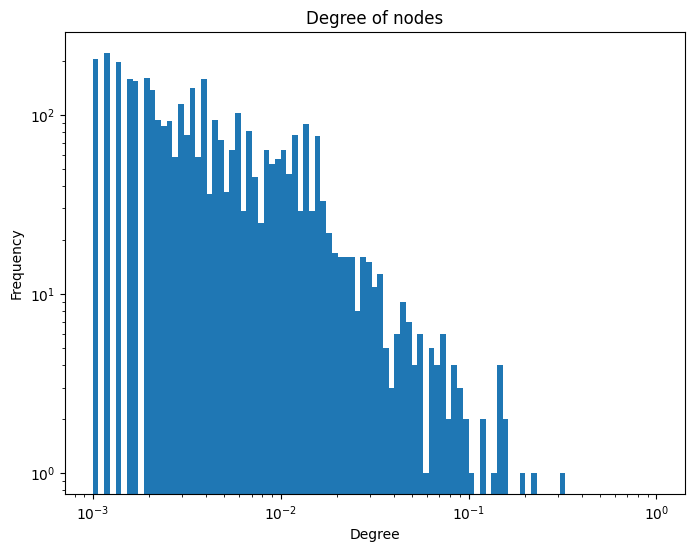

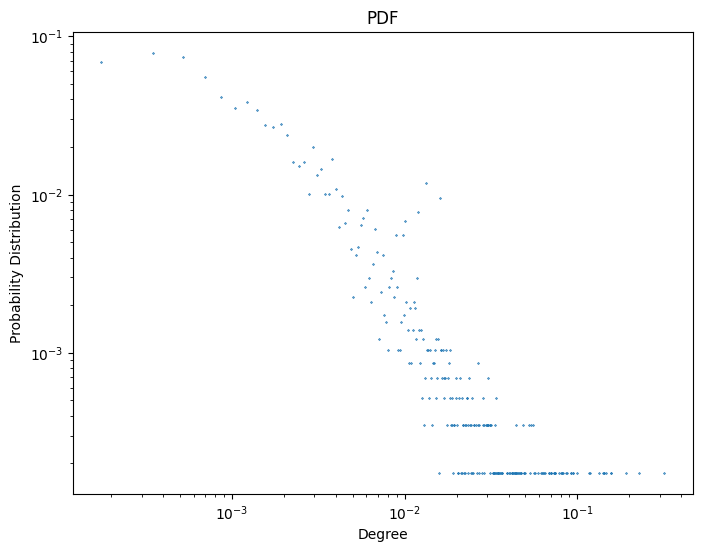

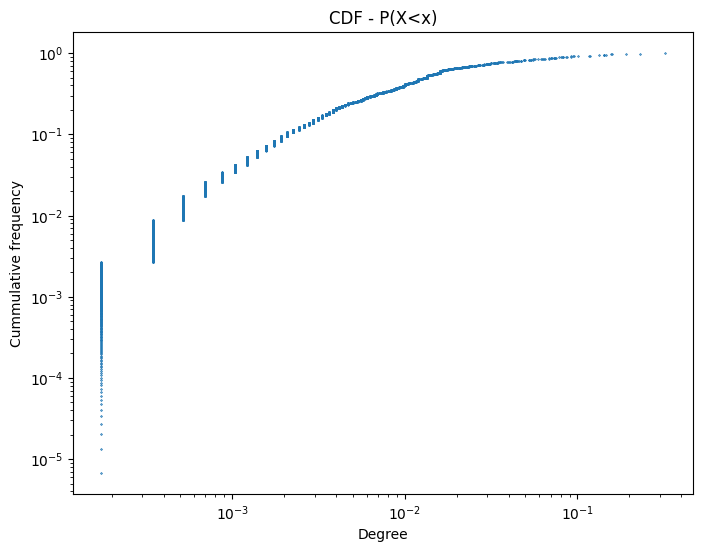

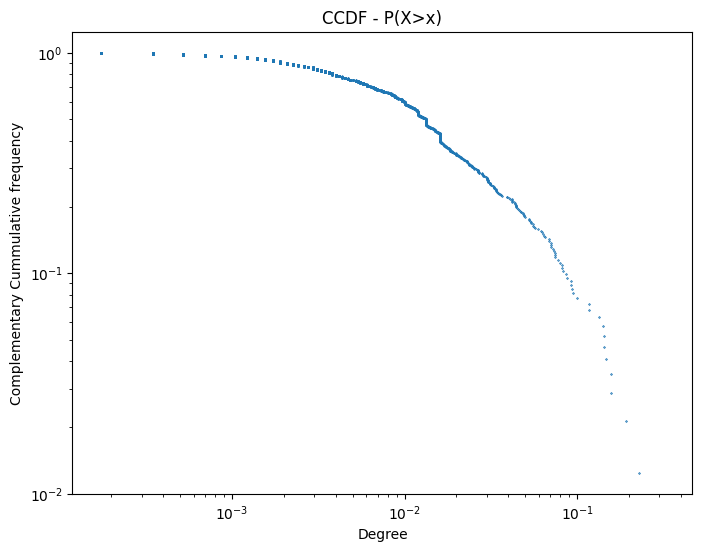

In [5]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

MANIFESTACION = "9n"
hora = "437038"


graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distribution(hora, graphs_folder, plots_folder)
